# Plotting with Matplotlib

`matplotlib` is a python package that provides plotting utilities in Python similar to matlab.  The primary interface with `matplotlib` is the `pyplot` module. Each `pyplot` function makes some change to a figure: e.g., create a figure, create a plotting area in a figure, plot some lines in a plotting area, decorate the plot with labels, etc. `matplotlib.pyplot` is stateful, in that it keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes.

It is common to import `matplotlib.pyplot` as

```python
import matplotlib.pyplot as plt
```

but in a IPython Notebook, it is more convenient to use the `pylab` magic

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The `pylab` magic performs the following imports

```python
from numpy import *
from matplotlib.pyplot import *

import numpy as np
import matplotlib.pyplot as plt
```

among others, and sets up the plotting backend so that figures appear inline in the notebook.

## Basic plotting

`pyplot.plot` plots lines and/or markers to the current Axes

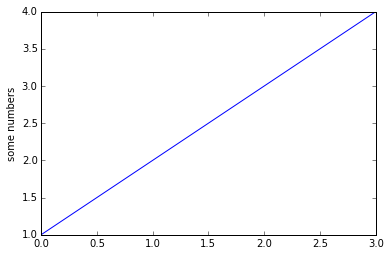

In [7]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers');

In the preceding commands, `plot`, `ylabel`, and `show` were explicitly referenced to the `pyplot` module.  The `%pylab` magic renders the `plt` prefix unnecessary.  Accordingly, the `plt` prefix will be dropped in the remainder of this notebook, except where clarity is needed. 

You may be wondering why the x-axis ranges from `0-3` and the y-axis from `1-4`. If you provide a single list or array to the `plot()` command, `matplotlib` assumes it is a sequence of `y` values, and automatically generates the `x` values for you. Since Python ranges start with 0, the default `x` vector has the same length as `y` but starts with 0. Hence the `x` data are `[0,1,2,3]`.

`plot()` is a versatile command and will take an arbitrary number of arguments. For example, to plot `y` versus `x`, you can issue the command:

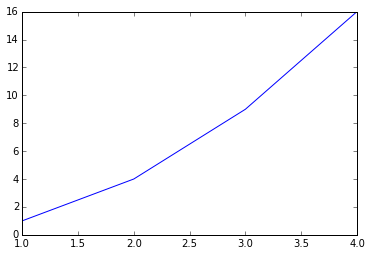

In [9]:
plot([1,2,3,4], [1,4,9,16])

For every `x`, `y` pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from matlab, and you concatenate a color string with a line style string. The default format string is `‘b-‘`, which is a solid blue line. For example, to plot the above with red circles with a green line through them, you would issue

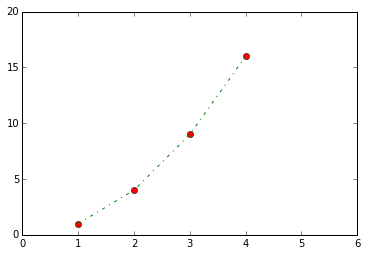

In [12]:
xp = array([1,2,3,4])
yp = xp ** 2
plot(xp, yp, 'ro', xp, yp, 'g-.')
axis([0, 6, 0, 20]);

See the `plot()` documentation for a complete list of line styles and format strings. The `axis()` command in the example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.

The example below illustrates a plotting several lines with different format styles in one command using arrays.

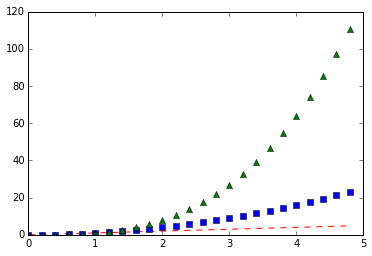

In [13]:
# evenly sampled time at 200ms intervals
t = arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^');

### Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see `matplotlib.lines.Line2D`. There are several ways to set line properties

- Use keyword args:

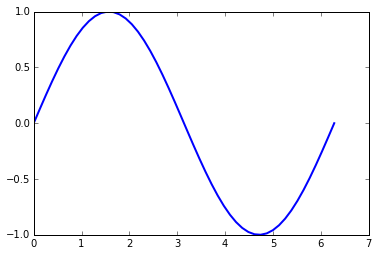

In [14]:
x = linspace(0, 2 * pi)
plot(x, sin(x), linewidth=2.0);

- Use the setter methods of the Line2D instance. `plot` returns a list of lines; e.g., 

```python
line1, line2 = plot(x1, y1, x2, y2)
```

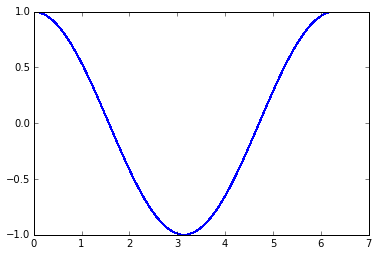

In [15]:
x = linspace(0, 2 * pi)
line, = plot(x, cos(x), '-')
line.set_antialiased(False) # turn off antialising

- Use the setp() command. The example below uses a matlab-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or matlab-style string/value pairs:

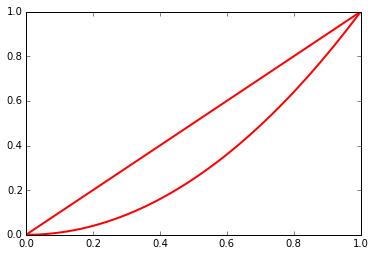

In [18]:
x = linspace(0, 1)
lines = plot(x, x, x, x**2)

# use keyword args
setp(lines, color='r', linewidth=2.0);

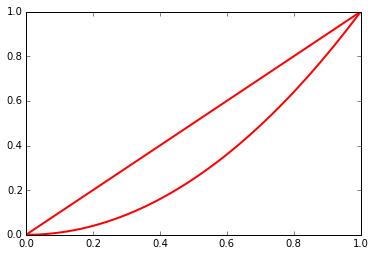

In [20]:
# or matlab style string value pairs
x = linspace(0, 1)
lines = plot(x, x, x, x**2)

setp(lines, 'color', 'r', 'linewidth', 2.0);

Here are the available `Line2D` properties.

|Property|Value Type|
|--------|----------|
|alpha|float|
|animated|[True &#124; False]|
|antialiased|or aa [True &#124; False]|
|clip_box|a matplotlib.transform.Bbox instance|
|clip_on|[True &#124; False]|
|clip_path|a Path instance and a Transform instance, a Patch|
|color|or c any matplotlib color|
|contains|the hit testing function|
|dash_capstyle|['butt' &#124; 'round' &#124; 'projecting']|
|dash_joinstyle|['miter' &#124; 'round' &#124; 'bevel']|
|dashes|sequence of on/off ink in points|
|data|(np.array xdata, np.array ydata)|
|figure|a matplotlib.figure.Figure instance|
|label|any string|
|linestyle|or ls [ '-' &#124; '--' &#124; '-.' &#124; ':' &#124; 'steps' &#124; ...]|
|linewidth|or lw float value in points|
|lod|[True &#124; False]|
|marker|[ '+' &#124; ',' &#124; '.' &#124; '1' &#124; '2' &#124; '3' &#124; '4' ]|
|markeredgecolor|or mec any matplotlib color|
|markeredgewidth|or mew float value in points|
|markerfacecolor|or mfc any matplotlib color|
|markersize|or ms float|
|markevery|[ None &#124; integer &#124; (startind, stride) ]|
|picker|used in interactive line selection|
|pickradius|the line pick selection radius|
|solid_capstyle|['butt' &#124; 'round' &#124; 'projecting']|
|solid_joinstyle|['miter' &#124; 'round' &#124; 'bevel']|
|transform|a matplotlib.transforms.Transform instance|
|visible|[True &#124; False]|
|xdata|np.array|
|ydata|np.array|
|zorder|any number|

To get a list of settable line properties, call the `setp()` function with a line or lines as a single argument

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  antialiased or aa: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color or c: any matplotlib color         
  contains: a callable function         
  dash_capstyle: ['butt' | 'round' | 'projecting']         
  dash_joinstyle: ['miter' | 'round' | 'bevel']         
  dashes: sequence of on/off ink in points         
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' |                   'steps-post']         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none']         
  gid: an 

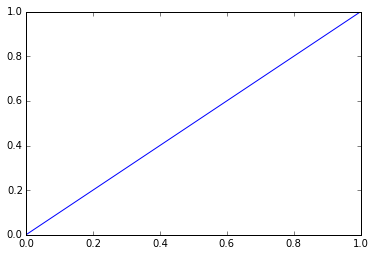

In [21]:
x = linspace(0, 1)
line, = plot(x, x)
setp(line)

## Working with multiple figures and axes

`pyplot` has the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function `gca()` returns the current axes (a `matplotlib.axes.Axes` instance), and `gcf()` returns the current figure (`matplotlib.figure.Figure` instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

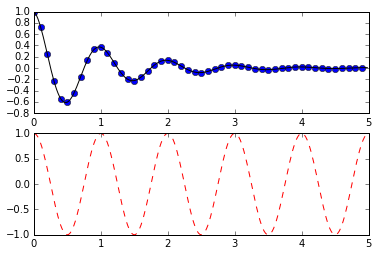

In [22]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

figure(1)
subplot(211)
plot(t1, f(t1), 'bo', t2, f(t2), 'k')

subplot(212)
plot(t2, np.cos(2*np.pi*t2), 'r--')

The `figure()` command here is optional because `figure(1)` will be created by default, just as a `subplot(111)` will be created by default if you don’t manually specify an axes. The `subplot()` command specifies `numrows`, `numcols`, `fignum` where `fignum` ranges from 1 to `numrows*numcols`. The commas in the `subplot` command are optional if `numrows*numcols<10`. So `subplot(211)` is identical to `subplot(2,1,1)`. You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the `axes()` command, which allows you to specify the location as `axes([left, bottom, width, height])` where all values are in fractional (0 to 1) coordinates.

You can create multiple figures by using multiple `figure()` calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

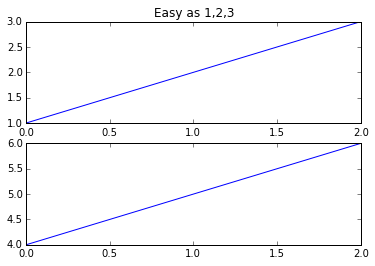

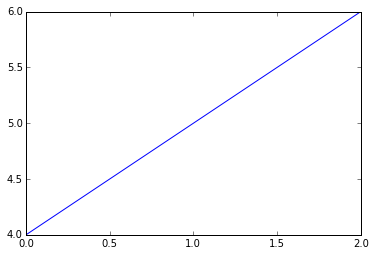

In [23]:
figure(1)                # the first figure
subplot(211)             # the first subplot in the first figure
plot([1,2,3])
subplot(212)             # the second subplot in the first figure
plot([4,5,6])


figure(2)                # a second figure
plot([4,5,6])            # creates a subplot(111) by default

figure(1)                # figure 1 current; subplot(212) still current
subplot(211)             # make subplot(211) in figure1 current
title('Easy as 1,2,3')   # subplot 211 title

You can clear the current figure with `clf()` and the current axes with `cla()`.

If you are making a long sequence of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with `close()`. Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until `close()` is called.

## Working with text
The `text()` command can be used to add text in an arbitrary location, and the `xlabel()`, `ylabel()`,  and `title()` are used to add text in the indicated locations (see [Text](http://matplotlib.org/users/text_intro.html) introduction for a more detailed example)

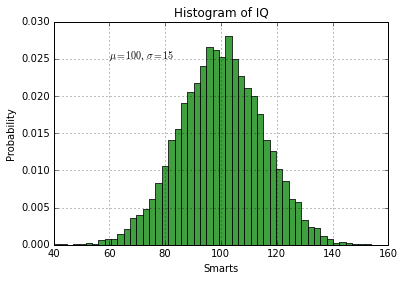

In [24]:
mu, sigma = 100, 15
x = mu + sigma * random.randn(10000)

# the histogram of the data
n, bins, patches = hist(x, 50, normed=1, facecolor='g', alpha=0.75)

xlabel('Smarts')
ylabel('Probability')
title('Histogram of IQ')
text(60, .025, r'$\mu=100,\ \sigma=15$')
axis([40, 160, 0, 0.03])
grid(True)

All of the `text()` commands return an `matplotlib.text.Text` instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using `setp()`:

```python
t = xlabel('my data', fontsize=14, color='red')
```

## Using mathematical expressions in text
`matplotlib` accepts $\TeX$ equation expressions in any text expression. For example to write the expression  in the title, you can write a $\TeX$ expression surrounded by dollar signs:

```python
title(r'$\sigma_i=15$')
```

The `r` preceding the title string is important – it signifies that the string is a raw string and not to treat backslashes as python escapes. `matplotlib` has a built-in $\TeX$ expression parser and layout engine, and ships its own math fonts – for details see [Writing mathematical expressions](http://matplotlib.org/users/mathtext.html#mathtext-tutorial). Thus, you can use mathematical text across platforms without requiring a $\TeX$ installation. For those who have $\LaTeX$ and `dvipng` installed, you can also use $\LaTeX$ to format your text and incorporate the output directly into your display figures or saved postscript – see [Text rendering With LaTeX](http://matplotlib.org/users/usetex.html#usetex-tutorial).

## Annotating text
The uses of the basic `text()` command above place text at an arbitrary position on the `Axes`. A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument `xy` and the location of the text `xytext`. Both of these arguments are `(x,y)` tuples.

(-2, 2)

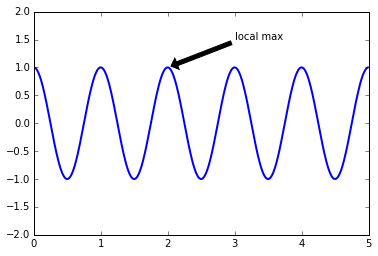

In [25]:
ax = subplot(111)

t = arange(0.0, 5.0, 0.01)
s = cos(2*np.pi*t)
line, = plot(t, s, lw=2)

annotate('local max', xy=(2, 1), xytext=(3, 1.5),
         arrowprops=dict(facecolor='black', shrink=0.05),)
ylim(-2,2)

In this basic example, both the `xy` (arrow tip) and `xytext` locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose – see [Annotating text](http://matplotlib.org/users/annotations_intro.html#annotations-tutorial) and [Annotating Axes](http://matplotlib.org/users/annotations_guide.html#plotting-guide-annotation) for details. More examples can be found in [pylab_examples](http://matplotlib.org/examples/pylab_examples/annotation_demo.html#pylab-examples-annotation-demo).